# Defining Questions

## 1. Has Nintendo consistently been the global leader in video game sales over the years?
## 2. Is there a significant difference in sales predictability between Nintendo and other game publishers?
## 3. What factors contribute to the predictability of video game sales for Nintendo compared to other publishers?
## 4. Within Nintendo's range of products, which franchises have been the most successful?
## 5. How do platform and genre affect the predicted success of a Nintendo franchise?
## 6. Are there any noticeable trends in the success of Nintendo franchises based on their platform or genre?

# Data Collection

### The data to be used in our analysis is a dataset comprised of video game sales in North America, Europe, Japan, and Globally. It also contains information pertaining to the games' genre, publisher, rank globally, and platform. Additional research was completed to add components of critic scores, user scores, and even the age rating for each game.

In [6]:
import pandas as pd

vgsales_df = pd.read_csv('vgsales.csv')

vgsales_df.head() 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning:

### To be able to answer our defining questions, the data needs to be separated into a nintendo and non ninetendo data frame. It will also be useful to handle null values at this stage of the analysis

### Separating dataframes into nintendo and non-nintendo publishers

In [1]:
import pandas as pd

vgsales_df = pd.read_csv('vgsales.csv')

# Assuming df_cleaned should be vgsales_df based on the context provided
nintendo_df = vgsales_df[vgsales_df['Publisher'] == 'Nintendo']
non_nintendo_df = vgsales_df[vgsales_df['Publisher'] != 'Nintendo']
nintendo_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Lets limit the non-nintendo data frame to only the top 5 publishers, making comparisons easier.

In [2]:
# Finding the top 5 publishers based on global sales
top_publishers = non_nintendo_df.groupby('Publisher')['Global_Sales'].sum().nlargest(5).index

non_nintendo_topdf = non_nintendo_df[non_nintendo_df['Publisher'].isin(top_publishers)]
non_nintendo_topdf.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E


### In order to answer some of our defining questions, we will create a data frame for the top 5 nintendo franchises

In [5]:
# Adjusting the identify_franchise function to consider if any of the first three words match for better accuracy.

def identify_franchise(name):
    if 'Pok' in name:
        return 'Pokemon'
    name_parts = name.split()[:3]  # Consider the first three words
    for franchise in known_franchises:
        franchise_parts = franchise.split()
        for part in name_parts:
            if part in franchise_parts:
                return franchise
    return ' '.join(name_parts)  # Join the first three words if no franchise is matched

nintendo_df['Franchise'] = nintendo_df['Name'].apply(lambda x: identify_franchise(x))

franchise_sales = nintendo_df.groupby('Franchise')['Global_Sales'].sum().nlargest(7)

top_nintendo_franchises_df = nintendo_df[nintendo_df['Franchise'].isin(franchise_sales.index)]

top_nintendo_franchises_df.head()

/tmp/ipykernel_295/1928115822.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Franchise'] = nintendo_df['Name'].apply(lambda x: identify_franchise(x))


,Name,Platform,Year_of_Release,Genre,Publisher,...,User_Score,User_Count,Developer,Rating,Franchise
0,Wii Sports,Wii,2006.0,Sports,Nintendo,...,8.0,322.0,Nintendo,E,Wii Sports
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,...,NaN,NaN,NaN,NaN,Mario
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,...,8.3,709.0,Nintendo,E,Mario
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,...,NaN,NaN,NaN,NaN,Pokemon
5,Tetris,GB,1989.0,Puzzle,Nintendo,...,NaN,NaN,NaN,NaN,Tetris


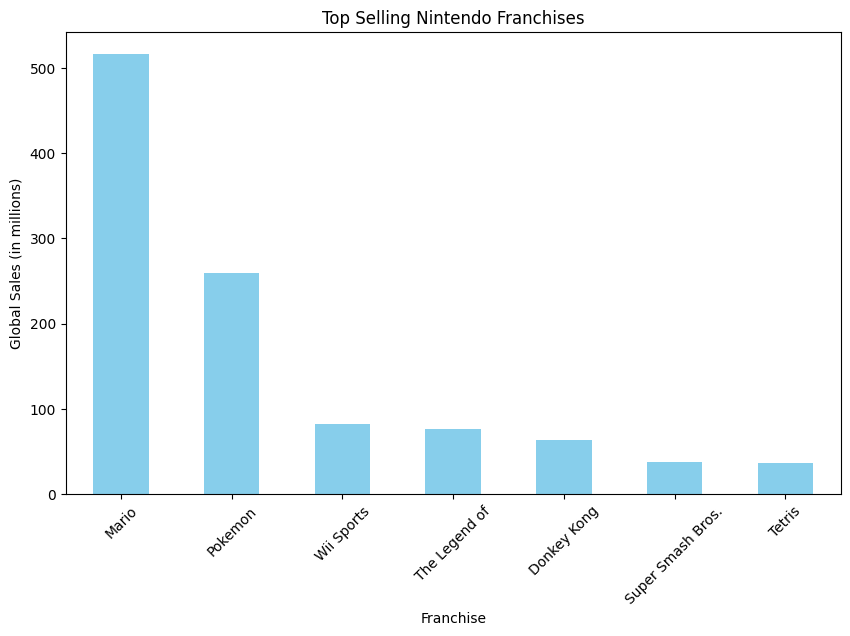

In [7]:
import matplotlib.pyplot as plt

# Summing up global sales for the top 5 Nintendo franchises and sorting them
top_franchises_sales = top_nintendo_franchises_df.groupby('Franchise')['Global_Sales'].sum().sort_values(ascending=False)

# Creating a bar plot for the top 5 selling Nintendo franchises
plt.figure(figsize=(10, 6))
top_franchises_sales.plot(kind='bar', color='skyblue')
plt.title('Top Selling Nintendo Franchises')
plt.xlabel('Franchise')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()